In [2]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Atlas Honda Limited.csv", parse_dates=['Date'], index_col='Date')
#instead of using to_datetime function we directly tell read_csv
#index is set using index_col
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4477 entries, 2001-01-01 to 2022-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4477 non-null   float64
 1   High    4477 non-null   float64
 2   Low     4477 non-null   float64
 3   Close   4477 non-null   float64
 4   Volume  4477 non-null   float64
dtypes: float64(5)
memory usage: 209.9 KB


In [ ]:
#.shift() method
#default value of periods = 1
df['shifted'] = df.Close.shift(periods=1)
#values have moved 1 step in future/forward
df[['Close','shifted']].head()

,Close,shifted
Date,,
2001-01-01,16.5,NaN
2001-01-08,17.5,16.5
2001-01-26,17.5,17.5
2001-02-08,17.0,17.5
2001-02-20,17.0,17.0


In [ ]:
#lagged values are 1 period into the past
#use negative to move in past
df['lagged'] = df.Close.shift(periods=-1)
df[[ 'shifted','Close', 'lagged']].tail()

,shifted,Close,lagged
Date,,,
2022-11-04,339.68,340.00,329.00
2022-11-07,340.00,329.00,338.99
2022-11-08,329.00,338.99,338.99
2022-11-10,338.99,338.99,338.99
2022-11-11,338.99,338.99,NaN


#### useful to calculate financial return 
#### (rate of change from time to time)

In [20]:
#div method  
df['change'] = df.Close.div(df.shifted) #relative change from the last period for every price
df[['Close','shifted', 'change']].head()

,Close,shifted,change
Date,,,
2001-01-01,16.5,NaN,NaN
2001-01-08,17.5,16.5,1.060606
2001-01-26,17.5,17.5,1.000000
2001-02-08,17.0,17.5,0.971429
2001-02-20,17.0,17.0,1.000000


##### calculating percentage change (subtract 1 and multiply by 100)

In [21]:
df['return'] = df.change.sub(1).mul(100)
df[['Close', 'shifted', 'change', 'return']].head()

,Close,shifted,change,return
Date,,,,
2001-01-01,16.5,NaN,NaN,NaN
2001-01-08,17.5,16.5,1.060606,6.060606
2001-01-26,17.5,17.5,1.000000,0.000000
2001-02-08,17.0,17.5,0.971429,-2.857143
2001-02-20,17.0,17.0,1.000000,0.000000


##### diff method

In [22]:
df['difference'] = df.Close.diff()
df[['Close', 'difference']].head()

,Close,difference
Date,,
2001-01-01,16.5,NaN
2001-01-08,17.5,1.0
2001-01-26,17.5,0.0
2001-02-08,17.0,-0.5
2001-02-20,17.0,0.0


##### calculating percentage change using .pct_change() method

In [25]:
df['pct_change'] = df.Close.pct_change().mul(100)
# multiply by 100 to get return
df[['Close', 'return', 'pct_change']]

,Close,return,pct_change
Date,,,
2001-01-01,16.50,NaN,NaN
2001-01-08,17.50,6.060606,6.060606
2001-01-26,17.50,0.000000,0.000000
2001-02-08,17.00,-2.857143,-2.857143
2001-02-20,17.00,0.000000,0.000000
...,...,...,...
2022-11-04,340.00,0.094206,0.094206
2022-11-07,329.00,-3.235294,-3.235294
2022-11-08,338.99,3.036474,3.036474


#### all these methods have period to calculate for x trading days

### Normalizing Series



In [17]:
Honda = pd.DataFrame({'Price':df.Close}, index = df.index)
Honda

,Price
Date,
2001-01-01,16.50
2001-01-08,17.50
2001-01-26,17.50
2001-02-08,17.00
2001-02-20,17.00
...,...
2022-11-04,340.00
2022-11-07,329.00
2022-11-08,338.99


In [18]:
first_price = Honda.Price.iloc[0]
first_price

np.float64(16.5)

In [20]:
normalized = Honda.Price.div(first_price).mul(100)
normalized.head()

Date
2001-01-01    100.000000
2001-01-08    106.060606
2001-01-26    106.060606
2001-02-08    103.030303
2001-02-20    103.030303
Name: Price, dtype: float64

<Axes: title={'center': 'Atlas Honda Normalized Series'}, xlabel='Date'>

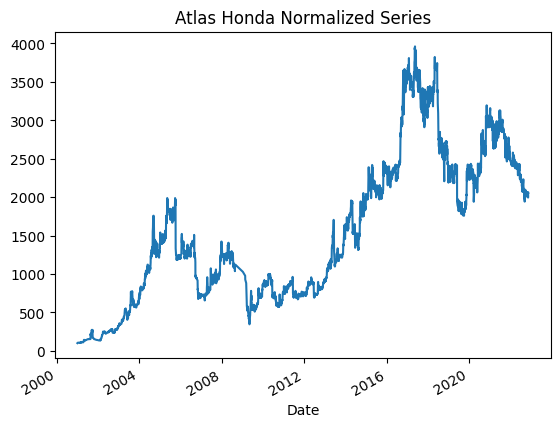

In [21]:
normalized.plot(title='Atlas Honda Normalized Series')

#### Creating a new dataframe containing price of 3 companies

In [39]:
#some more stocks
Indus = pd.read_csv('../Indus Motor Company Limited.csv',parse_dates=['Date'], index_col='Date')
Dewan = pd.read_csv('../Dewan Farooque Motors Limited.csv', parse_dates=['Date'], index_col='Date')
Indus.Close.tail()
Indus.shape

(5279, 5)

In [49]:
Dewan.Close.tail()
Dewan.shape
Dewan.head()

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-01,6.90,7.50,6.75,7.35,201500
2001-01-02,7.35,8.00,7.70,7.70,157000
2001-01-03,7.70,7.75,7.40,7.60,31500
2001-01-04,7.60,7.65,7.25,7.35,82500
2001-01-05,7.35,7.60,7.30,7.60,56000


In [43]:
Honda.Price.tail()
df.shape

(4477, 5)

#### Note that the dataset have different no. of rows or values
#### let's fix this

In [88]:
#merging data into one by common key which is date using outer to keep all available dates
prices = Honda.merge(Indus.Close, on='Date', how='outer').merge(Dewan.Close, on='Date', how='outer')
prices = prices.sort_values(by='Date')

#NOW our prices dataFrame contains null values so fill those
# prices.fillna(method='ffill', inplace=True)
prices.ffill(inplace=True)

#rename columns with company's name
prices = prices.rename(columns={'Price':'Honda', 'Close_x':'Indus', 'Close_y':'Dewan'})
prices.tail()
prices.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5362 entries, 2001-01-01 to 2022-11-14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Honda   5362 non-null   float64
 1   Indus   5362 non-null   float64
 2   Dewan   5362 non-null   float64
dtypes: float64(3)
memory usage: 167.6 KB


##### "normalizing"

<Axes: xlabel='Date'>

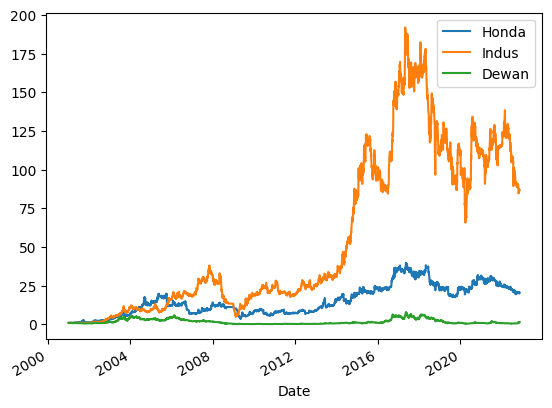

In [61]:
normalized_prices = prices.div(prices.iloc[0])
normalized_prices.plot()

In [89]:
kse = pd.read_csv('../Karachi 100 Historical Data.csv', parse_dates = ['Date'],index_col='Date')
prices = prices.merge(kse.Price, on='Date', how = 'outer')
prices = prices.rename(columns={'Price':'KSE-100'})
prices

,Honda,Indus,Dewan,KSE-100
Date,,,,
2001-01-01,16.50,10.65,7.35,"1,517.95"
2001-01-02,16.50,11.00,7.70,"1,522.16"
2001-01-03,16.50,11.20,7.60,"1,550.42"
2001-01-04,16.50,10.90,7.35,"1,550.04"
2001-01-05,16.50,10.75,7.60,"1,545.90"
...,...,...,...,...
2022-11-07,329.00,922.01,11.41,NaN
2022-11-08,338.99,929.16,10.55,NaN
2022-11-10,338.99,928.86,9.74,NaN


In [90]:
prices.dropna(inplace=True)
prices

,Honda,Indus,Dewan,KSE-100
Date,,,,
2001-01-01,16.50,10.65,7.35,"1,517.95"
2001-01-02,16.50,11.00,7.70,"1,522.16"
2001-01-03,16.50,11.20,7.60,"1,550.42"
2001-01-04,16.50,10.90,7.35,"1,550.04"
2001-01-05,16.50,10.75,7.60,"1,545.90"
...,...,...,...,...
2021-03-18,449.99,1100.18,5.79,"44,724.09"
2021-03-19,449.99,1037.28,5.77,"44,901.31"
2021-03-22,467.97,1067.46,5.81,"45,407.33"


In [ ]:

prices['KSE-100'] = prices['KSE-100'].str.replace(',', '').astype(float)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2001-01-01 to 2021-03-25
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Honda    4956 non-null   float64
 1   Indus    4956 non-null   float64
 2   Dewan    4956 non-null   float64
 3   KSE-100  4956 non-null   float64
dtypes: float64(4)
memory usage: 193.6 KB


<Axes: xlabel='Date'>

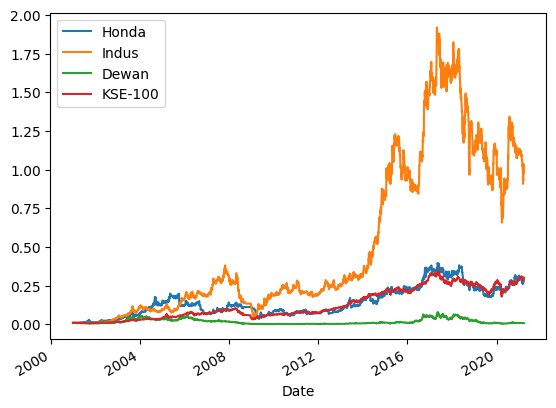

In [103]:
normalized_prices = prices.div(prices.iloc[0]).mul(100)
normalized_prices.plot()

<Axes: xlabel='Date'>

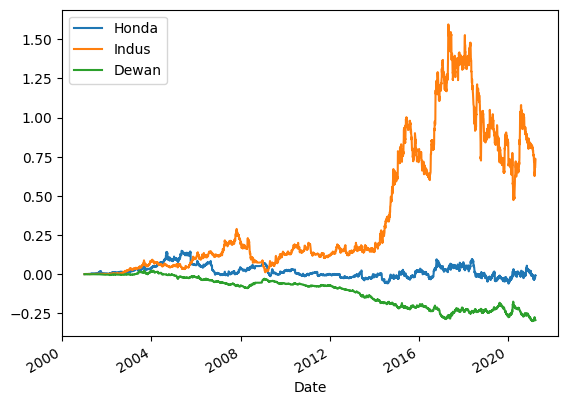

In [104]:
diff = normalized_prices[['Honda', 'Indus','Dewan']].sub(normalized_prices['KSE-100'],axis=0)
diff.plot()